Following [this tutorial](https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/19%3A_AgentBased_Models/19.02%3A_Building_an_Agent-Based_Model)

>It is important to keep in mind that just building an arbitrary ABM and obtaining results by simulation wouldn’t produce any scientifically meaningful conclusion. In order for an ABM to be scientifically meaningful, it has to be built and used in either of the following two complementary approaches:

>A. Build an ABM using model assumptions that are derived from empirically observed phenomena, and then produce previously unknown collective behaviors by simulation.

>B. Build an ABM using hypothetical model assumptions, and then reproduce empirically observed collective phenomena by simulation.

>The former is to use ABMs to make predictions using validated theories of agent behaviors, while the latter is to explore and develop new explanations of empirically observed phenomena.

# Schelling's Segregation Model

* Two agent types
* A 2D finite space
* Agents relocate based on type of agents nearby

In [112]:
import numpy as np
class Agent:
    def __init__(self):
        self.x, self.y = np.random.rand(2)
        self.type = np.random.choice([0,1])

    def __repr__(self):
        return f"Agent({self.type}, ({self.x:0.2f}, {self.y:0.2f}))"

In [113]:
# design rules for how agents interact with one another

def dist(agent1: Agent, agent2: Agent) -> float:
    return np.sqrt((agent1.x - agent2.x)**2 + (agent1.y - agent2.y)**2)

def get_neighbors(agent: Agent, population: list[Agent], radius: float) -> list[Agent]:
    return [
        nb for nb in population
        if dist(agent, nb) < radius
        and agent != nb
    ]

def update_agent(agent: Agent, population: list[Agent], radius: float, threshold: float) -> Agent:
    neighbors = get_neighbors(agent, population, radius)

    if neighbors:
        proportion = len([ag for ag in population if ag.type == agent.type]) / len(population)
        if proportion < threshold:
            agent.x, agent.y = np.random.rand(2)
    return agent


In [114]:
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(['b', 'r'])

def plot(population, ax = None):
    if not ax:
        fig, ax = plt.subplots()
    # x = [ag.x for ag in population]
    # y = [ag.y for ag in population]
    # type_ = [ag.type for ag in population]
    
    # ax.scatter(x, y, c=type_, cmap=cmap, s=10)

    pts0 = [ag for ag in population if ag.type == 0]
    x = [ag.x for ag in pts0]
    y = [ag.y for ag in pts0]
    ax.scatter(x, y, marker='o', s=20, facecolors='none', edgecolors='black')
    pts1 = [ag for ag in population if ag.type == 1]
    x = [ag.x for ag in pts1]
    y = [ag.y for ag in pts1]
    ax.scatter(x, y, marker='o', s=20, facecolors='black', edgecolors='black')
    
    return ax

100%|██████████| 1000000/1000000 [21:07<00:00, 788.99it/s]


<Axes: >

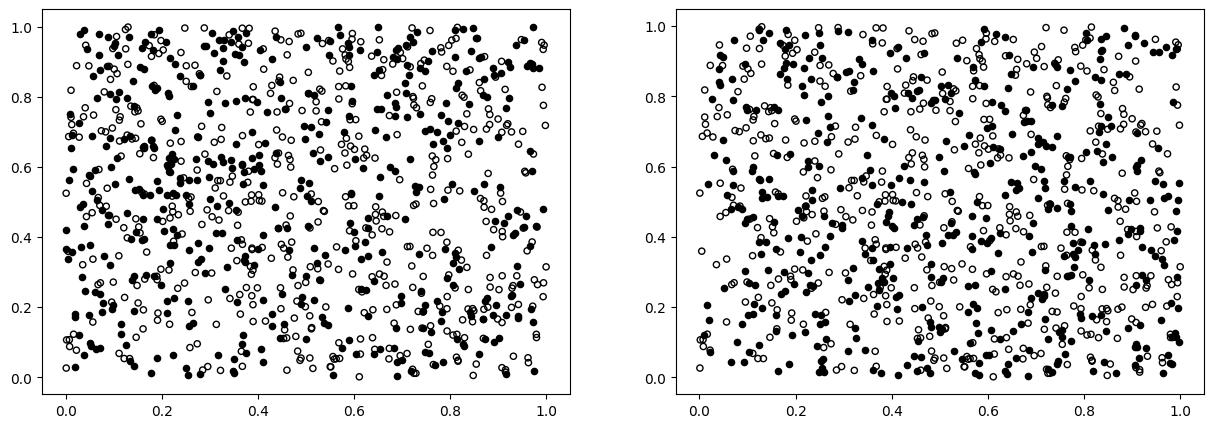

In [117]:
import tqdm
population = [Agent() for _ in range(1000)]


def iterate(population: list[Agent], radius: float, threshold: float) -> list[Agent]:
    """Perform one iteration of the entire population."""
    for idx, agent in enumerate(population):
        population[idx] = update_agent(agent, population, radius, threshold)
    return population


fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

plot(population, ax[0])

for _ in tqdm.tqdm(range(1_000_000)):
    # randomly select an agent
    a_idx = np.random.choice(a=len(population))

    population[a_idx] = update_agent(population[a_idx], population, 0.1, threshold=0.5)

plot(population, ax[1])



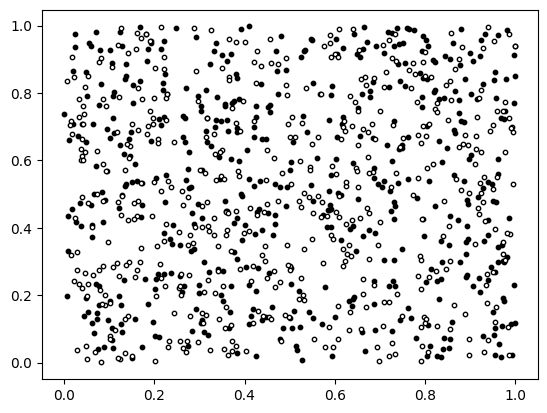

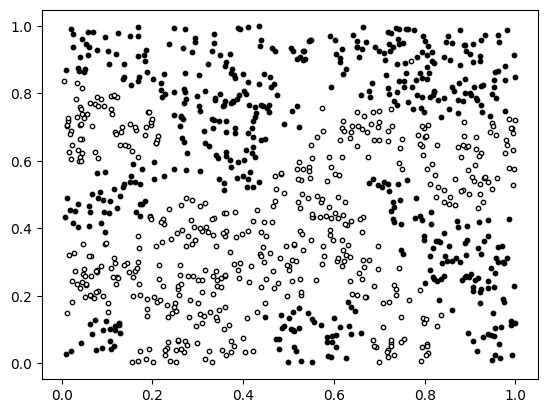

In [133]:
n = 1000
r = 0.1
th = 0.5

class agent:
    pass

def initialize():
    global agents
    agents = []
    for i in range(n):
        ag = agent()
        ag.type = np.random.randint(0,2)
        ag.x = np.random.rand()
        ag.y = np.random.rand()
        agents.append(ag)

def observe(ax=None):
    global agents
    if ax is None:
        fig, ax = plt.subplots()
    white = [ag for ag in agents if ag.type == 0]
    black = [ag for ag in agents if ag.type == 1]
    ax.scatter([ag.x for ag in white], [ag.y for ag in white], marker='o', color='black', s=10)
    ax.scatter([ag.x for ag in black], [ag.y for ag in black], marker='o', color='black', facecolor='white', s=10)
    

def update():
    global agents
    ag = agents[np.random.randint(len(agents))]
    neighbors = [nb for nb in agents
                 if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag]
    if len(neighbors) > 0:
        q = len([nb for nb in neighbors if nb.type == ag.type]) / float(len(neighbors))
        if q < th:
            ag.x, ag.y = np.random.rand(), np.random.rand()


initialize()
observe()
for _ in range(20_000):
    update()
observe()

Metric: for a point $x$, see if we iterated right now, would $x$ move or not? If so, the metric is 1; otherwise 0. Calc this for every point.


In [141]:
def metric():
    global agents
    R = 0
    ct = 0
    for ag in agents:
        ct += 1
        neighbors = [nb for nb in agents
                    if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag]
        if len(neighbors) > 0:
            q = len([nb for nb in neighbors if nb.type == ag.type]) / float(len(neighbors))
            if q < th:
                R += 1.0
    return ct, R / len(agents)

In [142]:
initialize()
metric()

(1000, 0.472)

In [153]:
n_steps = 10_000
metric_ = []
initialize()
metric_.append(metric()[1])
for idx in tqdm.tqdm(range(n_steps)):
    update()
    if idx % 100 == 0:
        metric_.append(metric()[1])

100%|██████████| 10000/10000 [00:49<00:00, 200.31it/s]


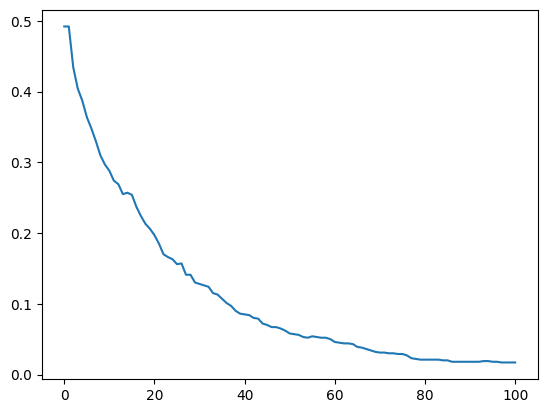

In [154]:
plt.plot(metric_)

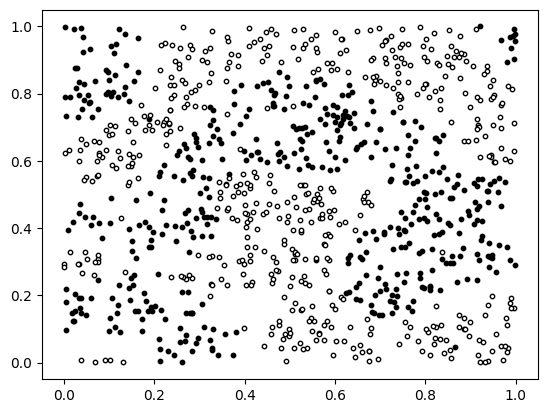

In [155]:
observe()